Is the graph strongly connected? True
Is the graph aperiodic? True
pi_bar = [0.23058252 0.16504854 0.27669903 0.18203883 0.14563107]


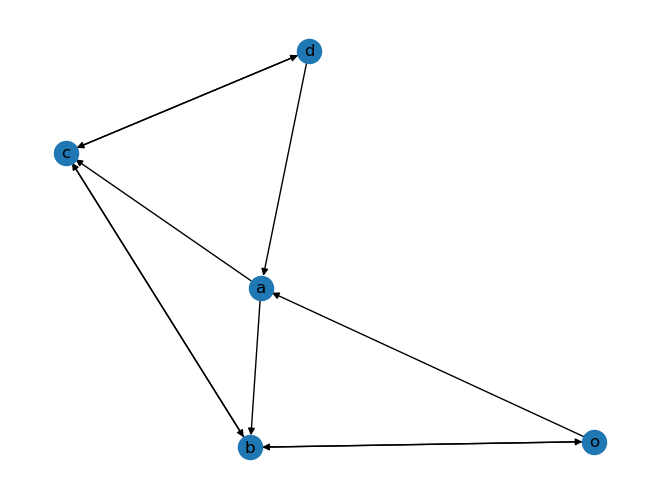

In [7]:
import networkx as nx
import numpy as np

TRM = np.array([
    [0, 2/5, 1/5, 0, 0],
    [0, 0, 3/4, 1/4, 0],
    [1/2, 0, 0, 1/3, 0],
    [0, 0, 1/3, 0, 2/3],
    [0, 1/2, 0, 1/3, 0]
])

# Compute P_bar, pi_bar
w = np.sum(TRM, axis=1)
w_star = np.max(w)
D = np.diag(w)
P = np.linalg.inv(D) @ TRM

P_bar = TRM/w_star 
P_bar = P_bar + np.diag(np.ones(len(w))-np.sum(P_bar,axis=1))

G = nx.from_numpy_array(TRM, create_using=nx.DiGraph)
mapping = {0:"o", 1:'a', 2:'b', 3:'c', 4:'d'}
nx.relabel_nodes(G, mapping, copy=False)
nx.draw(G, with_labels = True)

print('Is the graph strongly connected?', nx.is_strongly_connected(G))
print('Is the graph aperiodic?', nx.is_aperiodic(G))

# Unique stationary distribution => P_bar's rows converge to pi_bar:
pi_bar = np.linalg.matrix_power(P_bar, 1500)[0]

print("pi_bar =", pi_bar)

In [79]:
# a)

# number of simulations to average tot_time on
n_sim = int(1e2)
tot_time = 0
i = 0
res = np.zeros(n_sim, dtype=float)

while i < n_sim:
    pos = 1

    #compute time to leave
    while pos == 1:
        t_next = -np.log(np.random.rand()) / w[pos]
        pos = np.random.choice(5, p=P[pos,:])
        res[i] += t_next
    
    # compute time to return
    while pos != 1:
        t_next = -np.log(np.random.rand()) / w[pos]
        pos = np.random.choice(5, p=P[pos,:])
        res[i] += t_next

    i += 1

print("Average return time:", np.mean(res))
print("Variance:", np.var(res))

# b)
RT = 1/(w[1]*pi_bar[1])
print('Expected return time:', RT)


Average return time: 5.987763766688645
Variance: 17.945977476535077
Expected return time: 6.058823529411678


In [9]:
# c)

# number of simulations to average tot_time on
n_sim = 1e2
tot_time = 0
i = 0

while i < n_sim:
    pos = 0
    # compute time to get to d
    while pos != 4:
        t_next = -np.log(np.random.rand()) / w[pos]
        pos = np.random.choice(5, p=P[pos,:])
        tot_time += t_next

    i += 1

avg_time = tot_time/n_sim
print("Avg time to go from o to d:", avg_time)

Avg time to go from o to d: 10.021769193724758


In [47]:
# d)

# Problem can be written as y = Ax where x are the expected hitting times going to d starting from each node
A = np.array([
    [1, -2/3, -1/3, 0, 0],
    [0, 1, -3/4, -1/4, 0],
    [-3/5, 0,  1, -2/5, 0],
    [0, 0, -1/3, 1, -2/3],
    [0, 0, 0, 0, 1]
])

y = []
for wi in w:
    y.append(1/wi)
y[4] = 0

EHT = np.linalg.inv(A) @ y
print("Expected hitting time:", EHT[0])

Expected hitting time: 10.766666666666666


Is the graph strongly connected? True
Is the graph aperiodic? True
pi = [0.16521739 0.19710145 0.27536232 0.2173913  0.14492754]


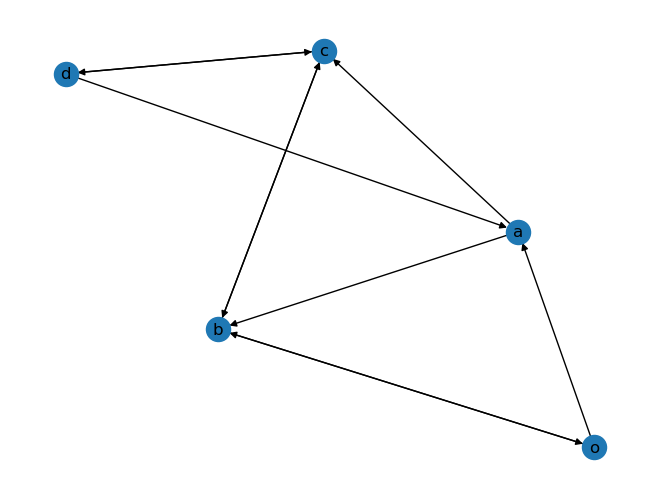

In [3]:
# e)
nx.draw(G, with_labels = True)

# Strong connection and aperiodicity is a sufficient condition for consensus, regardless of the initial condition
print('Is the graph strongly connected?', nx.is_strongly_connected(G))
print('Is the graph aperiodic?', nx.is_aperiodic(G))

# Strong connection guarantees the uniqueness of the invariant distribution, aperiodicity adds that each 
# eigenvalue besides 1 must have absolute value < 1 and therefore guarantees convergence
# pi can then be computed by simply raising matrix P to a very high power and taking any of its rows
pi = np.linalg.matrix_power(P, 1500)[0]
print('pi =', pi)

In [9]:
# f)

# Wisdom of crowds => var[alpha] = sum(var_i^2*pi_i^2)
var = np.array([1, 2, 2, 2, 1])
con_var = var @ np.power(pi, 2)
print('Theoretical variance:', con_var)

# Simulate:
nsims = 1e5
i=0
tot_var = 0
mean = 5

# To simulate: create array of gaussian distributed variables with arbitrary mean and std deviation
# according to given values, compute consensus then compute the average variance
while i < nsims:
    x0 = []
    for j in range(5):
        x0.append(np.random.normal(mean, np.sqrt(var[j])))

    x = pi@x0
    tot_var += (mean - np.mean(x))*(mean - np.mean(x))
    i += 1

print('Simulated variance:', tot_var/nsims)
    

Theoretical variance: 0.37216551144720705
Simulated variance: 0.37339615604290527


Is the graph strongly connected? False
Is the graph aperiodic? False
[2. 2. 2. 2. 2.]


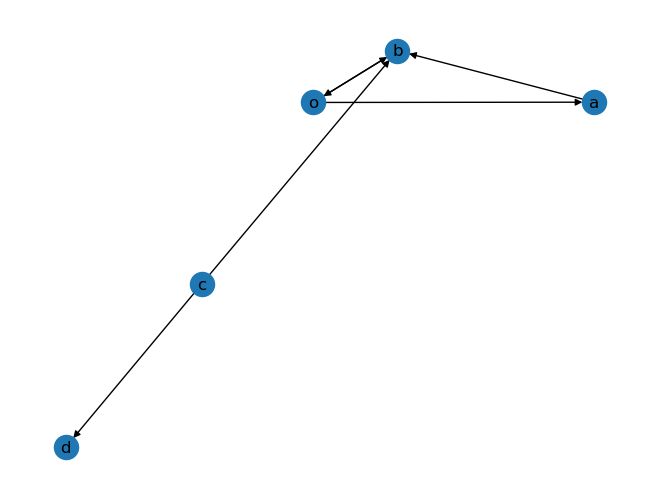

In [43]:
# g)

# Remove edges
TRM = np.array([
    [0, 2/5, 1/5, 0, 0],
    [0, 0, 3/4, 1/4, 0],
    [1/2, 0, 0, 1/3, 0],
    [0, 0, 1/3, 0, 2/3],
    [0, 1/2, 0, 1/3, 0]
])
TRM[4][1] = 0
TRM[4][3] = 0
TRM[1][3] = 0
TRM[2][3] = 0

G = nx.from_numpy_array(TRM, create_using=nx.DiGraph)
mapping = {0:"o", 1:'a', 2:'b', 3:'c', 4:'d'}
nx.relabel_nodes(G, mapping, copy=False)
nx.draw(G, with_labels=True)
print('Is the graph strongly connected?', nx.is_strongly_connected(G))
print('Is the graph aperiodic?', nx.is_aperiodic(G))

# d is a stubborn node, to model it we can simply impose P_dd = 1
w = np.sum(TRM, axis=1)
w[4] = 1
w_star = np.max(w)
D = np.diag(w)
P = np.linalg.inv(D) @ TRM
P[4][4] = 1

# example of consensus
x0 = np.array([1, 2, 3, 198978847, 2])
print(np.linalg.matrix_power(P, 1600)@x0)

It can immediately be seen that there are 2 sink components in the condensation graph, meaning that there are 2 groups which cannot communicate with each other: consensus cannot be reached.

We can analyze the dynamics of the strongly connected components 0 = {o, a, b}, 1 = {c} and 2 = {d}.
It can be easily seen that consensus can be reached in component 0, component d however is a single, stubborn node: this means that, since node c keeps averaging the 2 components, the only way to reach consensus over the whole graph is to start from a condition of consensus between component 0 and node d. If that is not the case, component 0 (which isn't influenced by other nodes) will reach its own consensus, while node c will converge to a value that is the weighted average of component 0 and node d (which will keep its initial value)

False


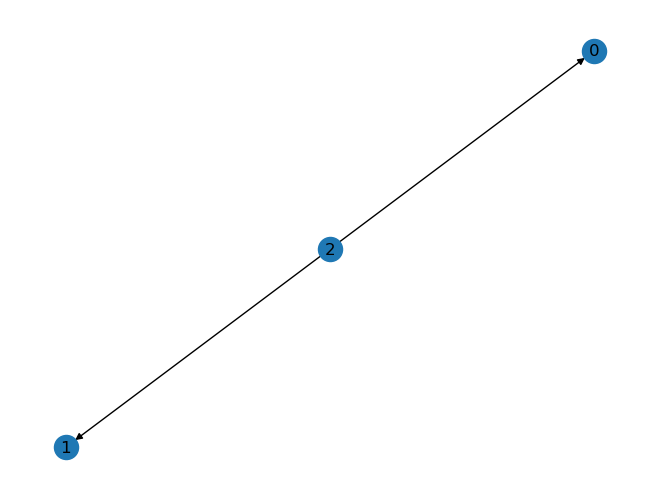

In [ ]:
GC = nx.condensation(G)
nx.draw(GC, with_labels=True)

Is the graph aperiodic? True
pi = [0.375 0.25  0.375]
Consensus value (if reached): 11.74999999999989
[11.75 11.75 11.75]


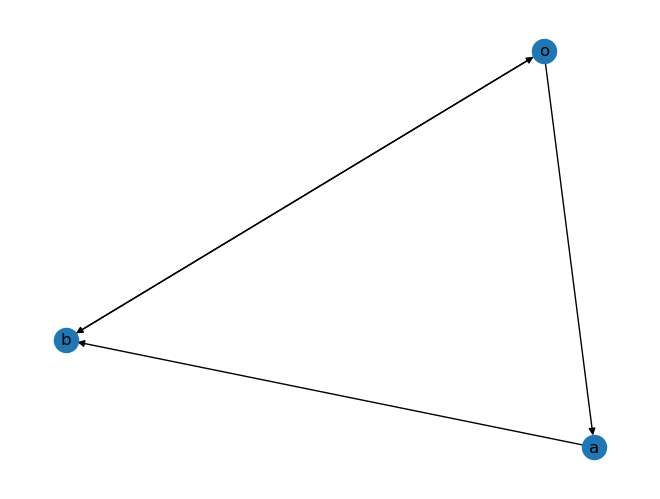

In [12]:
# Simulate component 0:
TRM = np.array([
    [0, 2/5, 1/5],
    [0, 0, 3/4,],
    [1/2, 0, 0]
])

G = nx.from_numpy_array(TRM, create_using=nx.DiGraph)
mapping = {0:"o", 1:'a', 2:'b'}
nx.relabel_nodes(G, mapping, copy=False)
nx.draw(G, with_labels=True)

print('Is the graph aperiodic?', nx.is_aperiodic(G))

w = np.sum(TRM, axis=1)
w_star = np.max(w)
D = np.diag(w)
P = np.linalg.inv(D) @ TRM

pi = np.linalg.matrix_power(P, 1500)[0]
print('pi =', pi)

x0 = [10, 23, 6]
print('Consensus value (if reached):', pi@x0)
print(np.linalg.matrix_power(P, 150)@x0)


[[0.         0.66666667 0.33333333 0.         0.        ]
 [0.         0.         0.75       0.25       0.        ]
 [0.         0.         0.         1.         0.        ]
 [0.         0.         0.33333333 0.         0.66666667]
 [0.         0.         0.         1.         0.        ]]
Is the graph strongly connected? False
Is the graph aperiodic? True


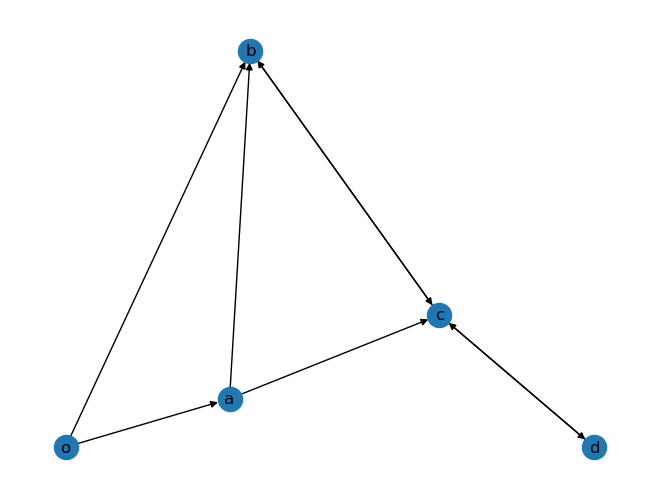

In [19]:
# h)

TRM = np.array([
    [0, 2/5, 1/5, 0, 0],
    [0, 0, 3/4, 1/4, 0],
    [1/2, 0, 0, 1/3, 0],
    [0, 0, 1/3, 0, 2/3],
    [0, 1/2, 0, 1/3, 0]
])
TRM[2][0] = 0
TRM[4][1] = 0

w = np.sum(TRM, axis=1)
w_star = np.max(w)
D = np.diag(w)
P = np.linalg.inv(D) @ TRM
print(P)

G = nx.from_numpy_array(TRM, create_using=nx.DiGraph)
mapping = {0:"o", 1:'a', 2:'b', 3:'c', 4:'d'}
nx.relabel_nodes(G, mapping, copy=False)
nx.draw(G, with_labels=True)

print('Is the graph strongly connected?', nx.is_strongly_connected(G))
print('Is the graph aperiodic?', nx.is_aperiodic(G))

[(0, {'members': {'b', 'c', 'd'}}), (1, {'members': {'a'}}), (2, {'members': {'o'}})]
Condensation graph:


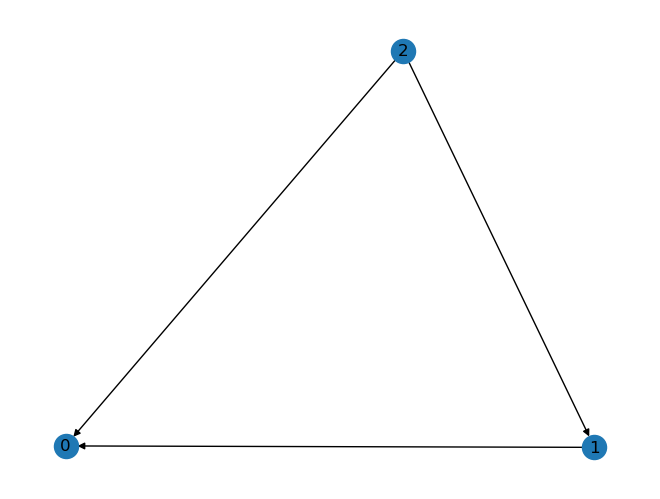

In [11]:
GC = nx.condensation(G)
print(GC.nodes.data())

print('Condensation graph:')
nx.draw(GC, with_labels=True)

Is the graph aperiodic? False
Connected component {b, c, d}:


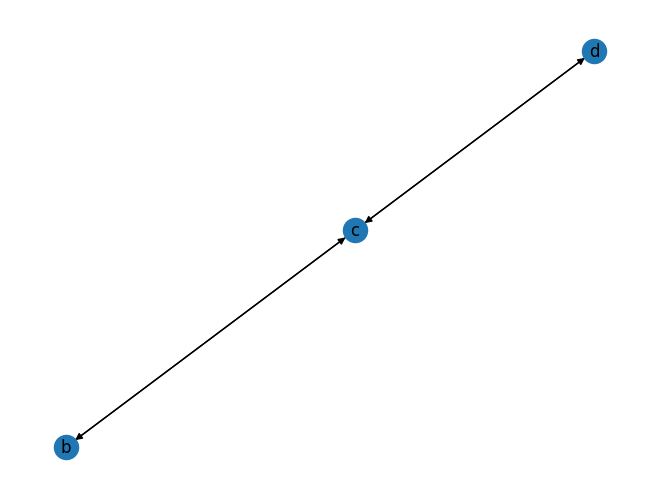

In [55]:
# Analyze behavior of connected component {b, c, d}
TRMC = np.array([
    [0, 1/3, 0],
    [1/3, 0, 2/3],
    [0, 1/3, 0]
])

GCC = nx.from_numpy_array(TRMC, create_using=nx.DiGraph)
mapping = {0:"b", 1:'c', 2:'d'}
nx.relabel_nodes(GCC, mapping, copy=False)
nx.draw(GCC, with_labels=True)

print('Is the graph aperiodic?', nx.is_aperiodic(GCC))

print('Connected component {b, c, d}:')

In [56]:
# Compute new P
w = np.sum(TRM, axis=1)
w_star = np.max(w)
D = np.diag(w)
P = np.linalg.inv(D) @ TRM

# Simulate dynamics for arbitrary initial values:
x0 = [1, 2, 3, 4, 5]
for i in range(10):
    print("x(%(t)d) ="%{'t':i}, np.linalg.matrix_power(P, i)@x0)



x(0) = [1. 2. 3. 4. 5.]
x(1) = [2.33333333 3.25       4.         4.33333333 4.        ]
x(2) = [3.5        4.08333333 4.33333333 4.         4.33333333]
x(3) = [4.16666667 4.25       4.         4.33333333 4.        ]
x(4) = [4.16666667 4.08333333 4.33333333 4.         4.33333333]
x(5) = [4.16666667 4.25       4.         4.33333333 4.        ]
x(6) = [4.16666667 4.08333333 4.33333333 4.         4.33333333]
x(7) = [4.16666667 4.25       4.         4.33333333 4.        ]
x(8) = [4.16666667 4.08333333 4.33333333 4.         4.33333333]
x(9) = [4.16666667 4.25       4.         4.33333333 4.        ]


Connected component {b, c, d} is periodic => no consensus reached unless all nodes start from the same opinion